<a href="https://colab.research.google.com/github/jhhalls/Learning_python/blob/master/mnist_classification_sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST Classification

######  @ author: Rohit_Raj_Jalheria

1. Introduction  
2. Data Exploration  
    2.1 Load Data  
    2.2 Check for null values  
    2.3 Understand data
3. Data Preprocessing  
    3.1 Feature Scaling / Normalization  
    3.2 Label Encoding  
4. Build Models  
    4.1  SVM  
    4.2 KNeighbors  
    4.3 Random Forest  
    4.4 Neural Network
5. Evaluate Models  
    5.1 Cross Validation   
6. Hyperparameter Tuning  
7. Predict and Submit  
    7.1 Confusion Matrix  
    7.2 Precision, Recall and F1 Scores  
    7.3 Predict and Submit Results

#  Introduction

Hello Instructors! I started this kernel right after I finished my sessions on **Classification**, and since they say "MNIST is the `hello world` of classification", I jumped into my First Project on Machine Learning to have some hands on experience.

This kernel consists of *7 main parts*, and 5th and 6th are a bit interchangeble. I will try to build 3 different models to classify MNIST images, SVM, KNN, and Random Decision Forest.

##### So let's sail !

# Data Exploration

This is the part where I get to know the data, how is it formatted, what properties it has etc.

###  Load Data

In [6]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

%matplotlib inline 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import os

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [7]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [8]:
!ls

gdrive	sample_data  x_test.csv  x_train.csv  y_test.csv  y_train.csv


In [9]:
train = pd.read_csv("/content/gdrive/My Drive/mnist_data/mnist_train.csv")
test = pd.read_csv("/content/gdrive/My Drive/mnist_data/mnist_test.csv")

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59999 entries, 0 to 59998
Columns: 785 entries, 5 to 0.617
dtypes: int64(785)
memory usage: 359.3 MB


In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Columns: 785 entries, 7 to 0.667
dtypes: int64(785)
memory usage: 59.9 MB


In [12]:
train.shape

(59999, 785)

In [13]:
train.head()

,5,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,...,0.578,0.579,0.580,0.581,0.582,0.583,0.584,0.585,0.586,0.587,0.588,0.589,0.590,0.591,0.592,0.593,0.594,0.595,0.596,0.597,0.598,0.599,0.600,0.601,0.602,0.603,0.604,0.605,0.606,0.607,0.608,0.609,0.610,0.611,0.612,0.613,0.614,0.615,0.616,0.617
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,147,252,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Test set is missing one column, and that is the `label` column, since images are in the form of `28x28` we have `784` feature columns for each image.

### 2.2 Check for null values 

In [14]:
train.isnull().any().describe()

count       785
unique        1
top       False
freq        785
dtype: object

In [15]:
test.isnull().any().describe()

count       785
unique        1
top       False
freq        785
dtype: object

It seems like we do not have any missing values. Perfect!

### 2.3 Split the Data

As I learned; we should always put our test set aside when we are exploring dataset, to prevent our brain to mislead us. Since we are trying to create a solution that generalizes and not memorizes, it is important to modify our data by looking at only to train set and not the test set. Test set should only be used for final evaluation.

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x_train = train.iloc[:,1:]
x_test = test.iloc[:,1:]
y_test = test.iloc[0:, 0]
y_train = train.iloc[0:,0]


print("Training Features:", x_train.shape)
print("Training Labels:", y_train.shape)
print("Testing Features:", x_test.shape)
print("Actual Labels:", y_test.shape)
print("Test Features:", test.shape)

Training Features: (59999, 784)
Training Labels: (59999,)
Testing Features: (9999, 784)
Actual Labels: (9999,)
Test Features: (9999, 785)


### save the files

In [18]:
x_test.to_csv('x_test.csv')
x_train.to_csv('x_train.csv')
y_test.to_csv('y_test.csv')
y_train.to_csv('y_train.csv')

### 2.4 Understand Data

In [19]:
x_train_explore = x_train.copy()
y_train_explore = y_train.copy()

# del x_train, y_train

In [20]:
x_test_explore = x_test.copy()
y_test_explore = y_test.copy()

In [21]:
y_train_explore.describe()

count    59999.000000
mean         4.453924
std          2.889294
min          0.000000
25%          2.000000
50%          4.000000
75%          7.000000
max          9.000000
Name: 5, dtype: float64

In [22]:
y_train_explore.value_counts().describe()

count      10.000000
mean     5999.900000
std       339.694781
min      5420.000000
25%      5867.750000
50%      5936.000000
75%      6087.750000
max      6742.000000
Name: 5, dtype: float64

In [23]:
unique_labels = np.unique(y_train_explore)
unique_labels

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [24]:
frequency = y_train_explore.value_counts()
frequency.sort_values(ascending=False)


1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5420
Name: 5, dtype: int64

In [25]:
type(frequency)

pandas.core.series.Series

In [26]:
transpose = frequency.T
transpose

1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5420
Name: 5, dtype: int64

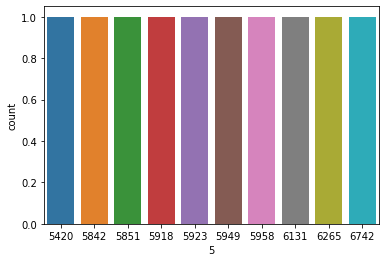

In [27]:
sns.countplot(x=frequency.index, data=frequency)

(array([1., 0., 0., 4., 2., 1., 1., 0., 0., 1.]),
 array([5420. , 5552.2, 5684.4, 5816.6, 5948.8, 6081. , 6213.2, 6345.4,
        6477.6, 6609.8, 6742. ]),
 <a list of 10 Patch objects>)

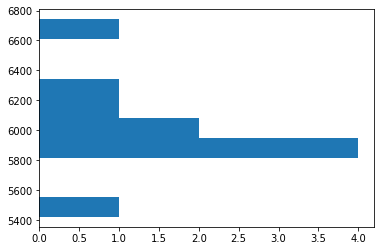

In [28]:
plt.hist(x=frequency, orientation='horizontal')

[]

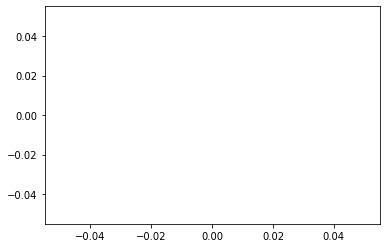

In [29]:
plt.plot(data=frequency.value_counts(), kind='line')

It looks like only 5 is little less than 4000 and the rest is almost evenly distributed.  


We can move on.

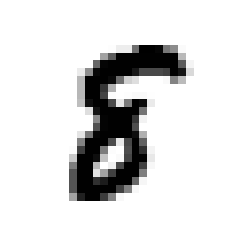

In [30]:
sample_digit = x_train_explore.iloc[2000] # a random instance
sample_digit_image = sample_digit.values.reshape(28, 28) # reshape it from (784,) to (28,28)
plt.imshow(sample_digit_image, # plot it as an image
           cmap = matplotlib.cm.binary,
           interpolation="nearest")
plt.axis("off")
plt.show()

As you can see our data is in this given format.

# 3. Data Preprocessing

### 3.1 Feature Scaling / Normalization

Working with numerical data that is in between `0-1` is more effective for most of the machine learning algortihms than `0-255`.  
We can easily scale our features to `0-1` range by dividing to `max` value (255).

We could use `MinMaxScaler` from `sklearn.preprocessing` but since the formula for that is `(x-min)/(max-min)` and our `min` is 0, we could directly calculate `x/max` and that is `x/255`.  

This is going to give the same result. So let's do it!


In [31]:
x_train_scaled = x_train_explore.copy()
x_train_scaled = x_train_scaled / 255.0


x_train_scaled.iloc[2]

0        0.0
0.1      0.0
0.2      0.0
0.3      0.0
0.4      0.0
        ... 
0.613    0.0
0.614    0.0
0.615    0.0
0.616    0.0
0.617    0.0
Name: 2, Length: 784, dtype: float64

In [32]:

x_test_scaled = x_test_explore.copy()
x_test_scaled = x_test_scaled / 255.0

np.array(x_test_scaled.iloc[2]).reshape(28,28)

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [33]:
sample_scaled = np.array(x_train_scaled.iloc[2]).reshape(28,28)

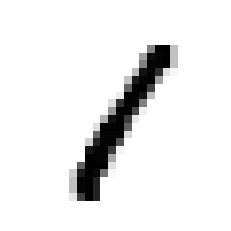

In [34]:
plt.imshow(sample_scaled, cmap = matplotlib.cm.binary)
plt.axis('off')
plt.show()

In [35]:
x_train = x_train_scaled.copy()
y_train = y_train_explore.copy()
x_test = x_test_scaled.copy()
y_test = y_test_explore.copy()

del x_train_explore, x_train_scaled, y_train_explore, x_test_explore, x_test_scaled, y_test_explore

# 4. Build Model

We are going to build the base models first, then we are going to try to  `fine-tune` them.

## Logistic Regression

In [36]:
from sklearn.linear_model import LogisticRegression 

In [37]:
log_reg = LogisticRegression()
log_reg = log_reg.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [38]:
log_pred = log_reg.predict(x_test)

In [39]:
log_pred

array([2, 1, 0, ..., 4, 5, 6])

In [40]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [41]:
log_cf = confusion_matrix(y_test, log_pred)

In [42]:
log_cf


array([[ 959,    0,    0,    3,    1,    7,    5,    4,    1,    0],
       [   0, 1111,    4,    2,    0,    2,    3,    2,   11,    0],
       [   5,    7,  929,   16,    8,    3,   15,    7,   38,    4],
       [   4,    1,   18,  916,    1,   23,    4,   11,   23,    9],
       [   1,    1,    7,    3,  916,    0,   10,    5,   10,   29],
       [  11,    2,    2,   32,    8,  782,   15,    5,   30,    5],
       [   9,    3,    7,    3,    7,   14,  912,    2,    1,    0],
       [   1,    8,   23,    6,    7,    1,    0,  950,    3,   28],
       [   9,   10,    8,   24,    8,   25,   11,    8,  859,   12],
       [   9,    8,    1,    9,   23,    7,    0,   19,    6,  927]])

In [43]:
accuracy_score(y_test, log_pred)

0.9261926192619262

### cross validation

In [44]:
from sklearn.model_selection import cross_val_score

def display_scores(scores):
    print("Scores:", scores)
    print("")
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

### logistic regression with cross validation

In [45]:
log_reg_scores = cross_val_score(log_reg,
                                 x_train,
                                 y_train,
                                 scoring="neg_mean_squared_error",
                                 cv=10,
                                 verbose=10)
log_reg_rmse_scores = np.sqrt(-log_reg_scores)

print("Logistic Regression Scores\n")
display_scores(log_reg_rmse_scores)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  ................................................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   24.6s remaining:    0.0s


[CV] ................................... , score=-1.167, total=  24.6s
[CV]  ................................................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   49.7s remaining:    0.0s


[CV] ................................... , score=-1.471, total=  25.0s
[CV]  ................................................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:  1.2min remaining:    0.0s


[CV] ................................... , score=-1.568, total=  25.2s
[CV]  ................................................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  1.7min remaining:    0.0s


[CV] ................................... , score=-1.217, total=  24.5s
[CV]  ................................................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  2.1min remaining:    0.0s


[CV] ................................... , score=-1.310, total=  25.1s
[CV]  ................................................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  2.5min remaining:    0.0s


[CV] ................................... , score=-1.353, total=  24.9s
[CV]  ................................................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:  2.9min remaining:    0.0s


[CV] ................................... , score=-1.366, total=  25.0s
[CV]  ................................................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:  3.3min remaining:    0.0s


[CV] ................................... , score=-1.514, total=  25.3s
[CV]  ................................................................


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  3.8min remaining:    0.0s


[CV] ................................... , score=-1.333, total=  25.2s
[CV]  ................................................................
[CV] ................................... , score=-1.027, total=  24.9s
Logistic Regression Scores

Scores: [1.0802006  1.21271046 1.25213152 1.10310169 1.14433387 1.16332856
 1.16890262 1.2305148  1.15433964 1.01341231]

Mean: 1.152297605044017
Standard deviation: 0.0686343899574791


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  4.2min finished


##  SVM

We are going to create the SVM model.  

SVM's SVC uses `One-versus-Rest/All (OvA/OvR)` by default, meaning that system trains 10 binary classifiers, one for each digit (a 0-detector, a 1-detector, a 2-detector, and so on). Then when you want to classify an image, you get the decision score from each classifier for that image and you select the class whose classifier outputs the highest score.

So to building 10 different classifiers going to take some time.

In [46]:
# Support Vector Classification
from sklearn.svm import SVC

In [47]:
svc_clf = SVC(gamma='auto', random_state=42, verbose=True)
svc_clf.fit(x_train, y_train)

[LibSVM]

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=True)

### Evaluating SVM

In [48]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report

In [50]:
svc_prediction = svc_clf.predict(x_test)
print("SVC Accuracy:", accuracy_score(y_true=np.array(y_test) ,y_pred=svc_prediction))

SVC Accuracy: 0.9443944394439444


In [51]:
type(y_test[:20])

pandas.core.series.Series

In [52]:
svc_prediction

array([2, 1, 0, ..., 4, 5, 6])

In [53]:
type(svc_prediction)

numpy.ndarray

In [54]:
svc_prediction[:20]

array([2, 1, 0, 4, 1, 4, 9, 6, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9])

In [55]:
precision_recall_fscore_support(y_test, svc_prediction)

(array([0.9593254 , 0.96804836, 0.93756098, 0.92690058, 0.93055556,
        0.92980437, 0.94683027, 0.95595596, 0.94092827, 0.94285714]),
 array([0.98673469, 0.9876652 , 0.93120155, 0.94158416, 0.95519348,
        0.9058296 , 0.96659708, 0.92989289, 0.91581109, 0.91575818]),
 array([0.97283702, 0.9777584 , 0.93437044, 0.93418468, 0.94271357,
        0.91766042, 0.95661157, 0.94274432, 0.92819979, 0.92911011]),
 array([ 980, 1135, 1032, 1010,  982,  892,  958, 1027,  974, 1009]))

In [56]:
print(classification_report(y_test, svc_prediction))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       980
           1       0.97      0.99      0.98      1135
           2       0.94      0.93      0.93      1032
           3       0.93      0.94      0.93      1010
           4       0.93      0.96      0.94       982
           5       0.93      0.91      0.92       892
           6       0.95      0.97      0.96       958
           7       0.96      0.93      0.94      1027
           8       0.94      0.92      0.93       974
           9       0.94      0.92      0.93      1009

    accuracy                           0.94      9999
   macro avg       0.94      0.94      0.94      9999
weighted avg       0.94      0.94      0.94      9999



In [58]:
# cross validation

In [ ]:
from sklearn.model_selection import cross_val_score

def display_scores(scores):
    print("Scores:", scores)
    print("")
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

### SVM with Cross validation

In [ ]:
svm_scores = cross_val_score(svc_clf, x_train, y_train, scoring="neg_mean_squared_error", cv=10, verbose=10)
svm_rmse_scores = np.sqrt(-svm_scores)

print("SVM Scores\n")
display_scores(svm_rmse_scores)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  ................................................................
[LibSVM][CV] ................................... , score=-0.908, total=13.4min
[CV]  ................................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 13.4min remaining:    0.0s


[LibSVM]

## 4.2 KNeighbors

We are going to create a K-Nearest Neighbor Classifier.  
We are going to `fit()` the data to the model.  

KNNs asks for a parameter `n_neighbors` which tells how many neighbor points should it check around it, and classify itself according to the ones that are closest to it.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
kn_clf = KNeighborsClassifier()
kn_clf.fit(x_train, y_train)

KNeighborsClassifier()

## 4.3 Random Forest

We are going to build the Random Forest classifier.
We are going to call `fit()` to train it.  

Random Forest is an ensemble machine learning algorithm, it trains many trees under the hood and the picks the one that performs the best. Random Forest has 2-3 parameters that we are going to tune and the better we tune it the better results we get.

In [ ]:
"""
from sklearn.ensemble import RandomForestClassifier
"""

In [ ]:
"""

I am commenting out this section since it is taking too much time, but feel free to uncomment and run it.

rf_clf = RandomForestClassifier(random_state=42, verbose=True)
rf_clf.fit(X_train, y_train)

"""

## 4.4 Neural Network Classifier

We are going to create the MLP classifier.
We are going to `fit()` the training data.

Multi-layer perceptron is the one that requires most modification. Of course default values are already set in its **\_\_init\_\_** method but it is better if we customize it according to our needs. Of course there are no strict rules these parameters but we are going to try to do our best.


In [ ]:
"""
from sklearn.neural_network import MLPClassifier
"""

In [ ]:
# Important parameters
# hidden layer size
# activation function
# alpha -> learning rate
# random_state -> set to get remove randomness effect for different runs
# momentum
# max_iter

"""

I am commenting out this section since it is taking too much time, but feel free to uncomment and run it.


mlp_clf = MLPClassifier(random_state=42)
mlp_clf.fit(X_train, y_train)

"""

# 5. Evaluate Models

In [ ]:
"""
from sklearn.metrics import accuracy_score
"""

In [ ]:
"""
X_validation_scaled = X_validation.copy()
X_validation_scaled = X_validation_scaled / 255.0
"""

In [ ]:
"""

I am commenting out this section since it is taking too much time, but feel free to uncomment and run it.

svc_prediction = svc_clf.predict(X_validation_scaled)
print("SVC Accuracy:", accuracy_score(y_true=y_validation ,y_pred=svc_prediction))

"""

SVC Accuracy: 0.934047619047619

In [ ]:
"""

I am commenting out this section since it is taking too much time, but feel free to uncomment and run it.

knn_prediction = kn_clf.predict(X_validation_scaled)
print("KNN Accuracy:", accuracy_score(y_true=y_validation ,y_pred=knn_prediction))

"""

KNN Accuracy: 0.9654761904761905

In [ ]:
"""

I am commenting out this section since it is taking too much time, but feel free to uncomment and run it.

rf_prediction = rf_clf.predict(X_validation_scaled)
print("Random Forest Accuracy:", accuracy_score(y_true=y_validation ,y_pred=rf_prediction))

"""

Random Forest Accuracy: 0.9419047619047619

In [ ]:
"""

I am commenting out this section since it is taking too much time, but feel free to uncomment and run it.

mlp_prediction = mlp_clf.predict(X_validation_scaled)
print("MLP Accuracy:", accuracy_score(y_true=y_validation ,y_pred=mlp_prediction))

"""

MLP Accuracy: 0.9745238095238096

These are the accuracy results for the models in their base forms, I mean without any tuning, **RandomForest** and **Neural Network (MLP)** performed well.

Thanks to [archaeocharlie](https://www.kaggle.com/archaeocharlie) I realised a different type of modification to apply and I changed the scale from grayscale to only black and white.

I am going to apply this and check the results for all other models.

### Transform Images to Black and White

In [ ]:
"""

I am commenting out this section since it is taking too much time, but feel free to uncomment and run it.

X_validation_bw = X_validation.copy()
X_train_bw = X_train.copy()

X_validation_bw[X_validation_bw > 0] = 1
X_train_bw[X_train_bw > 0] = 1

"""

In [ ]:
"""

I am commenting out this section since it is taking too much time, but feel free to uncomment and run it.

svc_bw_clf = SVC(gamma='auto', random_state=42, verbose=True)
svc_bw_clf.fit(X_train_bw, y_train)

"""

In [ ]:
"""

I am commenting out this section since it is taking too much time, but feel free to uncomment and run it.

kn_bw_clf = KNeighborsClassifier()
kn_bw_clf.fit(X_train_bw, y_train)

"""

In [ ]:
"""

I am commenting out this section since it is taking too much time, but feel free to uncomment and run it.

rf_bw_clf = RandomForestClassifier(random_state=42, verbose=True)
rf_bw_clf.fit(X_train_bw, y_train)

"""

In [ ]:
"""

I am commenting out this section since it is taking too much time, but feel free to uncomment and run it.

mlp_bw_clf = MLPClassifier(random_state=42)
mlp_bw_clf.fit(X_train_bw, y_train)

"""

In [ ]:
"""

I am commenting out this section since it is taking too much time, but feel free to uncomment and run it.

svc_bw_prediction = svc_clf.predict(X_validation_bw)
print("SVC BW Accuracy:", accuracy_score(y_true=y_validation ,y_pred=svc_bw_prediction))

"""

SVC BW Accuracy: 0.9226190476190477

In [ ]:
"""

I am commenting out this section since it is taking too much time, but feel free to uncomment and run it.

knn_bw_prediction = kn_clf.predict(X_validation_bw)
print("KNN Accuracy:", accuracy_score(y_true=y_validation ,y_pred=knn_bw_prediction))

"""

KNN Accuracy: 0.9630952380952381

In [ ]:
"""

I am commenting out this section since it is taking too much time, but feel free to uncomment and run it.

rf_bw_prediction = rf_clf.predict(X_validation_bw)
print("Random Forest Accuracy:", accuracy_score(y_true=y_validation ,y_pred=rf_bw_prediction))

"""

Random Forest Accuracy: 0.9166666666666666

In [ ]:
"""

I am commenting out this section since it is taking too much time, but feel free to uncomment and run it.

mlp_bw_prediction = mlp_clf.predict(X_validation_bw)
print("MLP Accuracy:", accuracy_score(y_true=y_validation ,y_pred=mlp_bw_prediction))

"""

MLP Accuracy: 0.9595238095238096

Converting to BW kinda overwrite Min-Max scaling effect. So these are totally different transformation, and clearly feature scaling is a better approach.

## 5.1 Cross Validation

In [ ]:
"""
from sklearn.model_selection import cross_val_score

def display_scores(scores):
    print("Scores:", scores)
    print("")
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
"""

### SVM

In [ ]:
"""

I am commenting out this section since it is taking too much time, but feel free to uncomment and run it.

svm_scores = cross_val_score(svc_clf, X_train, y_train, scoring="neg_mean_squared_error", cv=10, verbose=10)
svm_rmse_scores = np.sqrt(-svm_scores)

print("SVM Scores\n")
display_scores(svm_rmse_scores)
"""

### KNN

In [ ]:
"""

I am commenting out this section since it is taking too much time, but feel free to uncomment and run it.

kn_scores = cross_val_score(kn_clf, X_train, y_train, scoring="neg_mean_squared_error", cv=10, verbose=10)
kn_rmse_scores = np.sqrt(-kn_scores)

print("KNeighbor Scores\n")
display_scores(kn_rmse_scores)

"""

### Random Forest

In [ ]:
"""

I am commenting out this section since it is taking too much time, but feel free to uncomment and run it.

rf_scores = cross_val_score(rf_clf, X_train, y_train, scoring="neg_mean_squared_error", cv=10, verbose=10)
rf_rmse_scores = np.sqrt(-rf_scores)

print("Random Forest Scores\n")
display_scores(rf_rmse_scores)

"""

### MLP 

In [ ]:
"""

I am commenting out this section since it is taking too much time, but feel free to uncomment and run it.

mlp_scores = cross_val_score(mlp_clf, X_train, y_train, scoring="neg_mean_squared_error", cv=10, verbose=10)
mlp_rmse_scores = np.sqrt(-mlp_scores)

print("Neural Network Scores\n")
display_scores(mlp_rmse_scores)
"""

Scores: [0.63807008 0.75385403 0.70411055 0.6401844  0.81735991 0.72976497
 0.69986193 0.68349178 0.72595641 0.77671352]

Mean: 0.7169367594666385

Standard deviation: 0.05380741584858098

## 6. Hyperparameter Tuning

I am a big fan of GridSearch! You create a set of parameter combinations and you run your model with each of them and get the best parameter combination for that model. So let's do it!

### GridSearch

In [ ]:
"""
from sklearn.model_selection import GridSearchCV
"""

### Neural Network

In [ ]:
"""

I am commenting out this section since it is taking too much time, but feel free to uncomment and run it.

nn_parameter_grid = [
    {'hidden_layer_sizes': [(100, ), (200, ), (300, )],
     'solver': ['sgd', 'adam'],
     'learning_rate_init':[0.0001, 0.001]
    }
]

nn_grid_clf = MLPClassifier(random_state=42, verbose=True)
nn_grid_search = GridSearchCV(nn_grid_clf,
                              nn_parameter_grid,
                              cv=3,
                              scoring='neg_mean_squared_error',
                              verbose=3)
nn_grid_search.fit(X_train, y_train)

"""

In [ ]:
"""

cvres = nn_grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

"""

1.3016777939893878 {'hidden_layer_sizes': (100,), 'learning_rate_init': 0.0001, 'solver': 'sgd'}  
0.7858874268106391 {'hidden_layer_sizes': (100,), 'learning_rate_init': 0.0001, 'solver': 'adam'}  
0.9632946111841942 {'hidden_layer_sizes': (100,), 'learning_rate_init': 0.001, 'solver': 'sgd'}  
0.7544751846368469 {'hidden_layer_sizes': (100,), 'learning_rate_init': 0.001, 'solver': 'adam'}  
1.2809553313236808 {'hidden_layer_sizes': (200,), 'learning_rate_init': 0.0001, 'solver': 'sgd'}  
0.7334956530313408 {'hidden_layer_sizes': (200,), 'learning_rate_init': 0.0001, 'solver': 'adam'  }  
0.8997648134800114 {'hidden_layer_sizes': (200,), 'learning_rate_init': 0.001, 'solver': 'sgd'}  
0.712455326734661 {'hidden_layer_sizes': (200,), 'learning_rate_init': 0.001, 'solver': 'adam'}  
1.2637811745483698 {'hidden_layer_sizes': (300,), 'learning_rate_init': 0.0001, 'solver': 'sgd'}  
0.7171187204774808 {'hidden_layer_sizes': (300,), 'learning_rate_init': 0.0001, 'solver': 'adam'}  
0.8738408800221489 {'hidden_layer_sizes': (300,), 'learning_rate_init': 0.001, 'solver': 'sgd'}  
0.7087510439696313 {'hidden_layer_sizes': (300,), 'learning_rate_init': 0.001, 'solver': 'adam'}

In [ ]:
"""

nn_grid_search.best_params_

"""

{'hidden_layer_sizes': (300,), 'learning_rate_init': 0.001, 'solver': 'adam'}

### Random Forest

In [ ]:
"""

I am commenting out this section since it is taking too much time, but feel free to uncomment and run it.

rf_parameter_grid = [
    {
        'n_estimators': [60, 100, 200, 500],
        'max_features': [12, 30, 100, 300, 'auto']
    }
]

rf_grid_clf = RandomForestClassifier(random_state=42, verbose=True)
rf_grid_search = GridSearchCV(rf_grid_clf,
                              rf_parameter_grid,
                              cv=None,
                              scoring='neg_mean_squared_error',
                              verbose=2)
rf_grid_search.fit(X_train, y_train)

"""

In [ ]:
"""

cvres = rf_grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)
    
"""

0.8918650572947011 {'max_features': 12, 'n_estimators': 60}  
0.8688312407295935 {'max_features': 12, 'n_estimators': 100}  
0.8511274812964209 {'max_features': 12, 'n_estimators': 200}  
0.8394221998670452 {'max_features': 12, 'n_estimators': 500}  
0.8549575316659775 {'max_features': 30, 'n_estimators': 60}  
0.8316331863350311 {'max_features': 30, 'n_estimators': 100}  
0.8305668364684866 {'max_features': 30, 'n_estimators': 200}  
0.8183413344580241 {'max_features': 30, 'n_estimators': 500}  
0.8433210991019234 {'max_features': 100, 'n_estimators': 60}  
0.8353309390761112 {'max_features': 100, 'n_estimators': 100}  
0.8305827622023737 {'max_features': 100, 'n_estimators': 200}  
0.8200529083460241 {'max_features': 100, 'n_estimators': 500}  
0.8734775114237132 {'max_features': 300, 'n_estimators': 60}  
0.8598326402923824 {'max_features': 300, 'n_estimators': 100}  
0.8533469740973235 {'max_features': 300, 'n_estimators': 200}  
0.8530524091158835 {'max_features': 300, 'n_estimators': 500}  
0.85441585602472 {'max_features': 'auto', 'n_estimators': 60}  
0.838002790716521 {'max_features': 'auto', 'n_estimators': 100}  
0.8238668665243273 {'max_features': 'auto', 'n_estimators': 200}  
0.8244767460407266 {'max_features': 'auto', 'n_estimators': 500}  

In [ ]:
"""
rf_grid_search.best_params_
"""

{'max_features': 30, 'n_estimators': 500}

# 7. Predict and Submit

## 7.1 Confusion Matrix

In [ ]:
nn_tuned_clf = MLPClassifier(hidden_layer_sizes=(300,),
                            learning_rate_init=0.001,
                            solver='adam',
                            random_state=42,
                            verbose=True)
nn_tuned_clf.fit(X_train, y_train)

In [ ]:
nn_tuned_pred = nn_tuned_clf.predict(X_validation_scaled)

## 7.2 Precision, Recall and F1 Scores

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, precision_recall_fscore_support

In [ ]:
nn_precisions, nn_recalls, nn_f_beta_scores, nn_support = precision_recall_fscore_support(y_validation, nn_tuned_pred)
print("Precision of each class:", nn_precisions, "\n")
print("Recall of each class:", nn_recalls, "\n")
print("F Scores of each class:", nn_f_beta_scores, "\n")
print("Support of each class:", nn_support, "\n")

See [Sklearn Documentation for precision_recall_fscore_support()](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_fscore_support.html#sklearn.metrics.precision_recall_fscore_support)

The **precision** is the ratio `tp / (tp + fp)` where tp is the number of true positives and fp the number of false positives. _The precision is intuitively the ability of the classifier **not to label as positive a sample that is negative**._

The **recall** is the ratio `tp / (tp + fn)` where tp is the number of true positives and fn the number of false negatives. _The recall is intuitively the ability of the classifier **to find all the positive samples**._

The **F-beta score** can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its `best value at 1 and worst score at 0`.

The F-beta score weights recall more than precision by a factor of beta. `beta == 1.0` means `recall and precision are equally important.`

In [ ]:
f1_score(y_validation, nn_tuned_pred, average="micro") # This is the average

In [ ]:
nn_conf_matrix = confusion_matrix(y_validation, nn_tuned_pred)

In [ ]:
plt.matshow(nn_conf_matrix, cmap=plt.cm.gray)
plt.show()

Currently we can not talk about this graph so much, since these are the actual values and depending on the frequency of each digit this result may mislead us. It is better to look at the **error rates** and **not the actual number** of errors (mis-classified).

Because, if we had 1000 5s and 9999 1s, having 999 false classifications (errors) in 5s, and 1000 in 1s would be seen as "We had less error in 5s". But if we have used **rates** it would be clearer.

In [ ]:
nn_row_sums = nn_conf_matrix.sum(axis=1, keepdims=True)
nn_norm_conf_mx = nn_conf_matrix / nn_row_sums

In [ ]:
np.fill_diagonal(nn_norm_conf_mx, 0) # to keep only the errors we fill diagonal with 0s, since diagonal shows the ones that are correctly classified.
plt.matshow(nn_norm_conf_mx, cmap=plt.cm.gray)
plt.show()

The brighter squares represents higher values, meaning higher error rates.  

We can see that most of the **3s are mis-classified as 5**, some of the **4s are mis-classified as 9s**, and some of **7s are mis-classified as 2**. To solve these issues we may add some new features:

For example the main difference betweeen 5 and 3 is the postiion of the line in between, in 3s it closer to the middle, in 5s it is a bit higher.  

For 4 and 9 we can check to see if there are complete circles, which indicates that is a 9.  

For 7 and 2, the additional line in the bottom is what makes the most of the difference.

To get a better understanding of the error we may examine the mis-classified examples to what might be the reason for the error.

**PS: Increasing the total number of training samples for each digit would result in a increase in performance. We can also preprocess the images to make sure that they are not rotated and they fit well in the matrix.**

## 7.3 Predict and Submit Results

We are going to build the final classifier again, using the whole training set (including the validation set this time). Predict result for test set and submit our results.

### Get the dataset again and normalize it

In [ ]:
"""

final_train = train.copy()

final_X_train = final_train.drop(['label'], axis=1).copy()
final_y_train = final_train['label'].copy()

del final_train

final_X_train_scaled = final_X_train.copy()
final_X_train_scaled = final_X_train_scaled / 255.0
"""


### Train The Best Model (MLP in this case)

In [ ]:
"""
from sklearn.neural_network import MLPClassifier
"""

In [ ]:
"""

final_nn_clf = MLPClassifier(hidden_layer_sizes=(300,),
                            learning_rate_init=0.001,
                            solver='adam',
                            random_state=42)
final_nn_clf.fit(final_X_train_scaled, final_y_train)
"""


### Predict on Test Set

In [ ]:
"""
final_prediction = final_nn_clf.predict(test)
"""

### Submit Results

In [ ]:
"""

submission = pd.DataFrame({"ImageId": list(range(1,len(final_prediction)+1)),
                          "Label": final_prediction})
"""

In [ ]:
"""
submission.to_csv("cnn_mnist_submission.csv", index=False)
"""